<a href="https://colab.research.google.com/github/k-siddhartha-ai/k-siddhartha-ai/blob/main/Copy_of_spam__email_detection_in_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVC(probability=True, random_state=42)
trained svm model successfully
Test mail: 'click here to earn money'
Predicted class: 1 (0 = not fraud, 1 = fraud)
Class probabilities [not_fraud, fraud]: [0.66315885 0.33684115]
predictions on training data:
 np.str_('click here to earn money')      true=1 pred=1
 np.str_('tomarrow is holiday')           true=0 pred=0
 np.str_('download this image')           true=1 pred=1


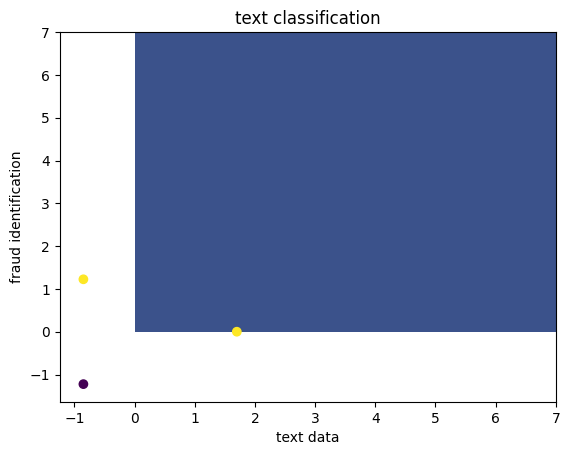

In [ ]:
#2)text classification spam mail or not
import numpy as np
from sklearn.svm import SVC as SVC
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#identifying spam mail using the text data
text=np.array(["click here to earn money","tomarrow is holiday","download this image"])
fraud=np.array([1,0,1])#0=not fraud 1=fraud
vectorizer=CountVectorizer().fit(text)
text_data=vectorizer.transform(text)
#model= using model to train the SVC based on data
model=SVC(kernel='rbf',probability=True,random_state=42).fit(text_data,fraud)
print(model)
print("trained svm model successfully")
test="click here to earn money"
c=vectorizer.transform([test])
d=model.predict(c)[0]
e=model.predict_proba(c)[0]
#print("predicting for {test}:,{prediction:[0]} (0=not fraud,1=fraud)")
print(f"Test mail: {test!r}")
print(f"Predicted class: {d} (0 = not fraud, 1 = fraud)")
print(f"Class probabilities [not_fraud, fraud]: {e}")
print("predictions on training data:")
train_preds=model.predict(text_data)
for mail,true_y,p in zip(text,fraud,train_preds):
  print(f" {mail!r:40} true={true_y} pred={p}")
#here we reducing the high-dimensional text features into 2D
a=text_data.toarray()
pca=PCA(n_components=2)
a=pca.fit_transform(a)
#retraining the svm on 2d data for visualization
c=SVC(kernel='rbf')
c.fit(a,fraud)
#create meshgrid in 2d space
testtest,fraudfraud=a[:,0].min()-1,a[:,0].max()+1
y_min,y_max=a[:,1].min()-1,a[:,1].max()+1
testtest,fraudfraud=np.meshgrid(np.linspace(0,7,100),np.linspace(0,7,100))
grid=np.c_[testtest.ravel(),fraudfraud.ravel()]
z=c.predict(grid).reshape(testtest.shape)
plt.contourf(testtest,fraudfraud,z,cmap='viridis')
plt.scatter(a[:,0],a[:,1],c=fraud)
plt.title("text classification")
plt.xlabel("text data")
plt.ylabel("fraud identification")
plt.show()